In [1]:
# Import dependencies
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
breed_info_df = pd.read_csv("AKC Breed Info.csv",encoding='latin1')

# Rename columns
breed_info_df.rename(columns={"height_low_inches":"Height (low)",
                            "height_high_inches":"Height (high)",
                            "weight_low_lbs":"Weight (low)",
                            "weight_high_lbs":"Weight (high)"}, inplace=True)

#sorting
breed_info_df=breed_info_df.sort_values("Breed",ascending=True, inplace=False)
breed_info_df=breed_info_df.reset_index(drop=True)

#print
breed_info_df.head()

,Breed,Height (low),Height (high),Weight (low),Weight (high)
0,Affenpinscher,9.0,12.0,8.0,12.0
1,Afghan Hound,25.0,27.0,50.0,60.0
2,Airdale Terrier,22.0,24.0,45.0,45.0
3,Akita,26.0,28.0,80.0,120.0
4,Alaskan Malamute,NaN,NaN,NaN,NaN


In [3]:
#Seperating height for cleaning
breed_height_df = pd.DataFrame({"Breed":breed_info_df["Breed"],
                                "Height (low)":breed_info_df["Height (low)"],
                                "Height (high)":breed_info_df["Height (high)"]})

#dropping rows if missing values
breed_height_df= breed_height_df.dropna(axis=0,how="any")

#astype change
breed_height_df["Height (low)"] = breed_height_df["Height (low)"].astype("float64")
breed_height_df["Height (high)"] = breed_height_df["Height (high)"].astype("float64")

#adding new column for average values
breed_height_df["Height (avg)"] = breed_height_df[["Height (low)","Height (high)"]].mean(axis=1)

#sorting
breed_height_df=breed_height_df.sort_values("Breed",ascending=True, inplace=False)
breed_height_df=breed_height_df.reset_index(drop=True)

#print
breed_height_df.head()

,Breed,Height (low),Height (high),Height (avg)
0,Affenpinscher,9.0,12.0,10.5
1,Afghan Hound,25.0,27.0,26.0
2,Airdale Terrier,22.0,24.0,23.0
3,Akita,26.0,28.0,27.0
4,American Eskimo,9.0,19.0,14.0


In [4]:
#average height accross all breeds
avg_height = breed_height_df["Height (avg)"].mean()
print("average height per breed =",avg_height,'inches')

average height per breed = 19.45608108108108 inches


In [5]:
#Seperating weight for cleaning
breed_weight_df = pd.DataFrame({"Breed":breed_info_df["Breed"],
                                "Weight (low)":breed_info_df["Weight (low)"],
                                "Weight (high)":breed_info_df["Weight (high)"]})

#dropping rows if missing values
breed_weight_df= breed_weight_df.dropna(axis=0,how="any")

#astype change
breed_weight_df["Weight (low)"] = breed_weight_df["Weight (low)"].astype("float64")
breed_weight_df["Weight (high)"] = breed_weight_df["Weight (high)"].astype("float64")

#adding new column for average values
breed_weight_df["Weight (avg)"] = breed_weight_df[["Weight (low)","Weight (high)"]].mean(axis=1)

#sorting
breed_weight_df=breed_weight_df.sort_values("Breed",ascending=True, inplace=False)
breed_weight_df=breed_weight_df.reset_index(drop=True)

#print
breed_weight_df.head()

,Breed,Weight (low),Weight (high),Weight (avg)
0,Affenpinscher,8.0,12.0,10.0
1,Afghan Hound,50.0,60.0,55.0
2,Airdale Terrier,45.0,45.0,45.0
3,Akita,80.0,120.0,100.0
4,American Eskimo,25.0,30.0,27.5


In [6]:
#average weight accross all breeds
avg_weight = breed_weight_df["Weight (avg)"].mean()
print("average weight per breed =",avg_weight,"pounds")

average weight per breed = 50.354729729729726 pounds


In [7]:
# Load the data into a Pandas DataFrame
breed_rating_df = pd.read_csv("AKC_Popular_Breeds_2013-2016.csv",encoding='latin1')

# Rename column
breed_rating_df.rename(columns={"ï»¿Breed":"Breed"}, inplace=True)

#dropping rows if missing values
breed_rating_df= breed_rating_df.dropna(axis=0,how="any")

#astype change
breed_rating_df["2016 Rank"] = breed_rating_df["2016 Rank"].astype("float64")
breed_rating_df["2015 Rank"] = breed_rating_df["2015 Rank"].astype("float64")
breed_rating_df["2014 Rank"] = breed_rating_df["2014 Rank"].astype("float64")
breed_rating_df["2013 Rank"] = breed_rating_df["2013 Rank"].astype("float64")

#adding new column for average values
breed_rating_df["Avg Ranking"] = breed_rating_df[["2016 Rank","2015 Rank", "2014 Rank","2013 Rank"]].mean(axis=1)

# Rename columns
breed_rating_df.rename(columns={"2016 Rank":"2016 Ranking",
                                "2015 Rank":"2015 Ranking",
                                "2014 Rank":"2014 Ranking",
                                "2013 Rank":"2013 Ranking"}, inplace=True)

#sorting
breed_rating_df=breed_rating_df.sort_values("Breed",ascending=True, inplace=False)
breed_rating_df=breed_rating_df.reset_index(drop=True)

#removing the last letter from each row (names were pluralized)
    #breed_rating_df["Breed"] = breed_rating_df["Breed"].str[:-1]
for index, row in breed_rating_df.iterrows():
    breed = row['Breed']
    if breed.endswith("s"):
        modified_breed = breed[:-1]
        breed_rating_df.at[index, 'Breed'] = modified_breed

#print
breed_rating_df.head()

,Breed,2016 Ranking,2015 Ranking,2014 Ranking,2013 Ranking,Avg Ranking
0,Affenpinscher,149.0,136.0,144.0,143.0,143.00
1,Afghan Hound,113.0,100.0,98.0,95.0,101.50
2,Airdale Terrier,55.0,53.0,57.0,56.0,55.25
3,Akita,46.0,46.0,46.0,45.0,45.75
4,Alaskan Malamute,59.0,54.0,54.0,57.0,56.00


In [8]:
#average ranking accross all breeds
avg_rating = breed_rating_df["Avg Ranking"].mean()
print("average ranking per breed =",avg_rating,"points")

average ranking per breed = 91.18785310734464 points


In [9]:
#unique count check
print(f"height breed count =",len(breed_height_df["Breed"].unique()))
print(f"weight breed count =",len(breed_weight_df["Breed"].unique()))
print(f"ranking breed count =",len(breed_rating_df["Breed"].unique()))

height breed count = 148
weight breed count = 148
ranking breed count = 177


In [10]:
#unique names 1
#print(breed_height_df["Breed"].unique())

#unique names 2
#print(breed_rating_df["Breed"].unique())

In [11]:
#merging
breed_info_df2 = pd.merge(breed_height_df, breed_weight_df, how="left", on=["Breed", "Breed"])
master_df = pd.merge(breed_info_df2, breed_rating_df, how="left", on=["Breed", "Breed"])

#sorting
master_df=master_df.sort_values("Breed",ascending=True, inplace=False)
master_df=master_df.reset_index(drop=True)

#print
master_df.head()

,Breed,Height (low),Height (high),Height (avg),Weight (low),Weight (high),Weight (avg),2016 Ranking,2015 Ranking,2014 Ranking,2013 Ranking,Avg Ranking
0,Affenpinscher,9.0,12.0,10.5,8.0,12.0,10.0,149.0,136.0,144.0,143.0,143.00
1,Afghan Hound,25.0,27.0,26.0,50.0,60.0,55.0,113.0,100.0,98.0,95.0,101.50
2,Airdale Terrier,22.0,24.0,23.0,45.0,45.0,45.0,55.0,53.0,57.0,56.0,55.25
3,Akita,26.0,28.0,27.0,80.0,120.0,100.0,46.0,46.0,46.0,45.0,45.75
4,American Eskimo,9.0,19.0,14.0,25.0,30.0,27.5,122.0,118.0,120.0,110.0,117.50


In [12]:
#null count check
null_check = master_df.copy()
null_list = null_check[null_check['Avg Ranking'].isnull()]


#print
    #null_list
print(f"null count =",len(null_list))

null count = 35


In [13]:
#cleaning
master_df= master_df.dropna(axis=0,how="any")

#average only database
master_avg_df = pd.DataFrame({"Breed": master_df["Breed"],
                              "Height (avg)": master_df["Height (avg)"],
                              "Weight (avg)": master_df["Weight (avg)"],
                              "Avg Ranking": master_df["Avg Ranking"]})

#print
master_avg_df.head()

,Breed,Height (avg),Weight (avg),Avg Ranking
0,Affenpinscher,10.5,10.0,143.00
1,Afghan Hound,26.0,55.0,101.50
2,Airdale Terrier,23.0,45.0,55.25
3,Akita,27.0,100.0,45.75
4,American Eskimo,14.0,27.5,117.50


In [14]:
#unique count check
print(f"master breed count =",len(master_df["Breed"].unique()))

master breed count = 113


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

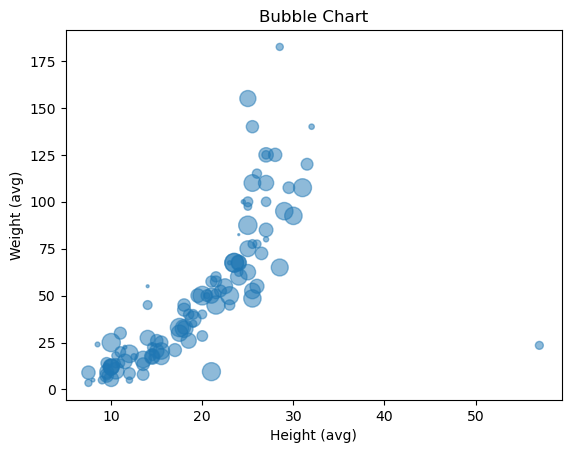

In [15]:
# Select the columns for the bubble chart
x = master_df['Height (avg)']
y = master_df['Weight (avg)']
size = master_df['Avg Ranking']

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=size, alpha=0.5)

# Customize the plot
ax.set_xlabel('Height (avg)')
ax.set_ylabel('Weight (avg)')
ax.set_title('Height vs Weight')

ax.legend(title=master_df['Breed']) 

# Show the plot
plt.show()